# Final Project Report

* Class: DS 5100
* Student Name: Ashley Miller
* Student Net ID: asm2fe
* This URL: https://github.com/ashley-m/DS5100-finalproject-asm2fe/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/ashley-m/DS5100-finalproject-asm2fe/tree/main

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

# A code block with your classes.
```python
import numpy as np
import pandas as pd
from numbers import Number
# import random as rn

class Die:
    '''
-   A die has N sides, or “faces”, and W weights, and can be rolled
    to select a face.

-   For example, a “die” with N = 2 is a coin, and a one with
    N = 6 is a standard die.

-   Normally, dice and coins are “fair,” meaning that the each side
    has an equal weight. An unfair die is one where the weights are
    unequal.

-   Each side contains a unique symbol. Symbols may be all alphabetic or
    all numeric.

-   W defaults to 1.0 for each face but can be changed after the
    object is created.

-   The weights are just positive numbers (integers or floats, including 0),
    not a normalized probability distribution.

-   The die has one behavior, which is to be rolled one or more times.
    '''
    def __init__(self, sides):
        '''
    -   Takes a NumPy array of faces as an argument. Throws a `TypeError` if
        not a NumPy array.

    -   The array’s data type `dtype` may be strings or numbers.

    -   The array’s values must be distinct. Tests to see if the values are
        distinct and raises a `ValueError` if not.

    -   Internally initializes the weights to 1.0 for each face.

    -   Saves both faces and weights in a private data frame with faces in
        the index.
        '''
        try:
            if not isinstance(sides, np.ndarray):
                raise TypeError('Not an array')
            if len(set(sides)) != len(sides):
                raise ValueError('Faces must be unique')
            
            self.weight = np.ones(len(sides))
            self._data = pd.DataFrame(data= self.weight, index= sides)
        except (TypeError, ValueError) as e:
            print('Error: ', e) 

    def adj_wt(self, face, wt):
        '''
    -   Takes two arguments: the face value to be changed and the new
        weight.

    -   Checks to see if the face passed is valid value, i.e. if it is in
        the die array. If not, raises an `IndexError`.

    -   Checks to see if the weight is a valid type, i.e. if it is numeric
        (integer or float) or castable as numeric. If not, raises a
        `TypeError`.
        '''
        try:
            if face not in self._data.index:
                raise IndexError('Invalid face')
            elif (not isinstance(float(wt), float)) or wt<0:
                raise TypeError('Invalid reassignment weight')
            else:
                self._data.loc[face] = wt

        except (IndexError, TypeError) as e:
            print('Error: ', e)

    def roll(self, n = 1):
        '''
    -   Takes a parameter of how many times the die is to be rolled;
        defaults to 1.

    -   This is essentially a random sample with replacement, from the
        private die data frame, that applies the weights.

    -   Returns a Python list of outcomes.

    -   Does not store internally these results.
        '''
        roll = self._data.sample(weights=self._data[0], n=n, replace= True).index.to_list()
        return roll

    def get_state(self):
        '''
    -   Returns a copy of the private die data frame.
        '''
        return self._data

class Game:
    '''
-   A game consists of rolling of one or more similar dice (Die objects)
    one or more times. 

-   By similar dice, we mean that each die in a given game has the same
    number of sides and associated faces, but each die object may have
    its own weights. 

-   Each game is initialized with a Python list that contains one or
    more dice.

-   Game objects have a behavior to play a game, i.e. to roll all of the
    dice a given number of times.

-   Game objects only keep the results of their most recent play.
    '''

    def __init__(self, dice_list):
        '''
    -   Takes a single parameter, a list of already instantiated similar
        dice.
        '''
        self._dice_set = dice_list

    def play(self, i = 1):
        '''
    -   Takes an integer parameter to specify how many times the dice should
        be rolled.

    -   Saves the result of the play to a private data frame.

    -   The data frame is in wide format, it has the roll number
        as a named index, columns for each die number (using its list index
        as the column name), and the face rolled in that instance in each
        cell.
        '''
        if not isinstance(i, int):
            raise TypeError('invalid number of plays')
        ls = []
        for d in self._dice_set:
            ls.append(d.roll(i))
        self._result_frame = pd.DataFrame(ls)
        self._result_frame = self._result_frame.T
        self._result_frame.index = [i for i in range(1, len(self._result_frame.index)+1)]
        self._result_frame.columns = [j for j in range(1, len(self._result_frame.columns)+1)]
        self._result_frame.index.name = 'roll #'
        self._result_frame.rename_axis('die #', axis='columns', inplace=True)
        return self._result_frame

    def last_play(self, width = 'WIDE'):
        '''
    -   This method just returns a copy of the private play data frame to
        the user.

    -   Takes a parameter to return the data frame in narrow or wide form
        which defaults to wide form.

    -   The narrow form will have a `MultiIndex`, comprising the roll number
        and the die number (in that order), and a single column with the
        outcomes (i.e. the face rolled).

    -   This method should raise a `ValueError` if the user passes an
        invalid option for narrow or wide.
        '''
        if width.upper() == 'WIDE':
            return self._result_frame
        elif width.upper() == 'NARROW':
            return self._result_frame.stack().to_frame('outcome')
        else:
            raise ValueError('Invalid width selection. Must be "narrow" or "wide"')

class Analyzer:
    '''
-   An Analyzer object takes the results of a single game and computes
    various descriptive statistical properties about it.'''

    def __init__(self, game_obj):
        '''
    -   Takes a game object as its input parameter. Throw a `ValueError` if
        the passed value is not a Game object.
        '''
        if not isinstance(game_obj, Game):
            raise ValueError('Argument passed was not a Game obj.')
        else:
            self._game = game_obj

    def jackpot(self):
        '''
    -   A jackpot is a result in which all faces are the same, e.g. all ones
        for a six-sided die.

    -   Computes how many times the game resulted in a jackpot.

    -   Returns an integer for the number of jackpots.
        '''
        wins = 0
        multi_fr = self._game.last_play('wide')
        
        # iterrows returns list of tuples so next()[1][1] 
        # returns first row of subframe corresponding to iteration
        # ie next(is a tuple)[accessing index of tuple][accessing row of subframe]
        
        if isinstance(multi_fr.index, pd.MultiIndex):
            for i in multi_fr.index.get_level_values(0).unique():
                outcomes = multi_fr.loc[i,'outcome']
                if outcomes.value_counts().iloc[0]==len(outcomes):
                    wins+=1
        else:
            for ind, row in multi_fr.iterrows():
                if row.value_counts().iloc[0] == len(row):
                    wins+=1

            
        return wins

    def face_roll(self):
        '''
    -   Computes how many times a given face is rolled in each event. For example, 
        if a roll of five dice has all sixes, then the counts for this roll 
        would be $5$ for the face value `6` and $0$ for the other faces.

    -   Returns a data frame of results.

    -   The data frame has an index of the roll number, face values as
        columns, and count values in the cells (i.e. it is in wide format).
        '''
        df = self._game.last_play('narrow')
        catf = pd.DataFrame()
        for i in df.index.get_level_values(0).unique():
                fs = df.loc[i]
                ff = fs.value_counts().to_frame().T
                ff.index = [i]
                catf = pd.concat([catf, ff])
        catf.rename_axis('roll #', inplace=True)
        catf.fillna(0, inplace=True)
        return catf

    def combo_count(self):
        '''
    -   Computes the distinct combinations of faces rolled, along with their
        counts.

    -   Combinations are order-independent and may contain repetitions.

    -   Returns a data frame of results.

    -   The data frame will have a MultiIndex of distinct combinations
        and a column for the associated counts.
        '''
        pf = self._game.last_play()
        count = pf.apply(lambda x: tuple(sorted(x)), axis=1).value_counts()
        com_df = pd.DataFrame(count)
        com_df.index = pd.MultiIndex.from_tuples(com_df.index)
        return com_df

    def perm_count(self):
        '''
    -   Computes the distinct permutations of faces rolled, along with their
        counts.

    -   Permutations are order-dependent and may contain repetitions.

    -   Returns a data frame of results.

    -   The data frame will have a MultiIndex of distinct permutations
        and a column for the associated counts.
        '''

        pf = self._game.last_play()
        count = pf.apply(lambda x: tuple(x), axis=1).value_counts()
        com_df = pd.DataFrame(count)
        com_df.index = pd.MultiIndex.from_tuples(com_df.index)
        return com_df
```

## Unittest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

# A code block with your test code.
```python
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer

class MonteCarloTestSuite(unittest.TestCase):

    def test_01_init_die(self):
        # d6a = Die(np.array(['a', 'b', 'c', 'd', 'e', 'f']))
        d6 = Die(np.array([1,2,3,4,5,6]))
        self.assertTrue(isinstance(d6, Die), 'Die dataframe initialized incorrectly')
    
    def test_02_adj_wt(self):
        d4 = Die(np.array([1,2,3,4]))
        d4.adj_wt(1, 5)
        self.assertTrue(d4.get_state().loc[1, 0] == 5)
    
    def test_03_roll(self):
        d2 = Die(np.array(['a','b']))
        d2.adj_wt('a', 2)
        rolls = d2.roll(3)
        self.assertTrue(isinstance(rolls, list))
    
    def test_04_state(self):
        d1 = Die(np.array([1]))
        self.assertTrue(isinstance(d1.get_state(), pd.DataFrame))

    def test_05_init_game(self):
        d_list = [Die(np.array(['a','b'])), Die(np.array(['a','b']))]
        g2 = Game(d_list)
        self.assertTrue(isinstance(g2, Game))
    
    def test_06_play(self):
        let = Die(np.array(['a','b','c']))
        d_list = [let, let, let, let]
        g3 = Game(d_list)  
        res_fr = g3.play(3)
        self.assertTrue(isinstance(res_fr, pd.DataFrame))

    def test_07_last_play(self):
        let = Die(np.array(['a','b','c']))
        d_list = [let, let, let, let]
        g2 = Game(d_list)  
        g2.play(3)
        res_fr = g2.last_play('narrow')

        self.assertTrue(isinstance(res_fr, pd.DataFrame))

    def test_08_anal_init(self):
        let = Die(np.array(['a','b','c']))
        d_list = [let, let, let, let]
        g3 = Game(d_list)  
        g3.play(3)
        ana = Analyzer(g3)
        self.assertTrue(isinstance(ana, Analyzer))

    def test_09_jack(self):
        let = Die(np.array(['a','b','c']))
        let.adj_wt('a', 10)
        d_list = [let, let, let, let]
        g3 = Game(d_list)  
        g3.play(3)
        ana = Analyzer(g3)
        jack = ana.jackpot()
        self.assertTrue(isinstance(jack, int))

    def test_10_face(self):
        let = Die(np.array(['a','b','c']))
        let.adj_wt('a', 10)
        d_list = [let, let, let, let]
        g3 = Game(d_list)  
        g3.play(3)
        ana = Analyzer(g3)
        self.assertTrue(isinstance(ana.face_roll(), pd.DataFrame))

    def test_11_comb(self):
        let = Die(np.array(['a','b','c']))
        let.adj_wt('a', 10)
        d_list = [let, let, let]
        g3 = Game(d_list)  
        g3.play(20)
        ana = Analyzer(g3)
        cc = ana.combo_count()
        self.assertTrue(isinstance(cc, pd.DataFrame))

    def test_12_perm(self):
        let = Die(np.array(['a','b','c']))
        let.adj_wt('a', 10)
        d_list = [let, let, let]
        g3 = Game(d_list)  
        g3.play(20)
        ana = Analyzer(g3)
        cc = ana.perm_count()
        self.assertTrue(isinstance(cc, pd.DataFrame))

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

# A text block with the output of a successful test.
```bash
asm2f@Apparition MINGW64 ~/Data Science/DS5100-finalproject-asm2fe/montecarlo (main)
$ python montecarlo_test.py 
test_01_init_die (__main__.MonteCarloTestSuite.test_01_init_die) ... ok
test_02_adj_wt (__main__.MonteCarloTestSuite.test_02_adj_wt) ... ok
test_03_roll (__main__.MonteCarloTestSuite.test_03_roll) ... ok
test_04_state (__main__.MonteCarloTestSuite.test_04_state) ... ok
test_05_init_game (__main__.MonteCarloTestSuite.test_05_init_game) ... ok
test_06_play (__main__.MonteCarloTestSuite.test_06_play) ... ok
test_07_last_play (__main__.MonteCarloTestSuite.test_07_last_play) ... ok
test_08_anal_init (__main__.MonteCarloTestSuite.test_08_anal_init) ... ok
test_09_jack (__main__.MonteCarloTestSuite.test_09_jack) ... ok
test_10_face (__main__.MonteCarloTestSuite.test_10_face) ... ok
test_11_comb (__main__.MonteCarloTestSuite.test_11_comb) ... ok
test_12_perm (__main__.MonteCarloTestSuite.test_12_perm) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.071s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo 
import montecarlo.montecarlo
from montecarlo.montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game

    class Analyzer(builtins.object)
     |  Analyzer(game_obj)
     |
     |  -   An Analyzer object takes the results of a single game and computes
     |      various descriptive statistical properties about it.
     |
     |  Methods defined here:
     |
     |  __init__(self, game_obj)
     |      -   Takes a game object as its input parameter. Throw a `ValueError` if
     |          the passed value is not a Game object.
     |
     |  combo_count(self)
     |      -   Computes the distinct combinations of faces rolled, along with their
     |          counts.
     |
     |      -   Combinations are order-independent and may contain repetitions.
     |
     |      -   Returns a data frame of results.
     |
     |      -   The data frame will have a MultiIndex of distinct combinations
     |          and a column for the associ

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/ashley-m/DS5100-finalproject-asm2fe/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
import pandas as pd


In [4]:

f_coin = Die(np.array(['H','T']))
u_coin = Die(np.array(['H','T']))
u_coin.adj_wt('T', 5)


In [5]:
f_coin.get_state()

face,0
H,1.0
T,1.0


In [6]:
u_coin.get_state()

face,0
H,1.0
T,5.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correctly and without error (1).

In [7]:
too_fair = Game([f_coin, f_coin])
too_fair.play(1000)

die #,1,2
roll #,,
1,T,H
2,T,H
3,H,T
4,H,H
5,T,H
...,...,...
996,H,H
997,T,T
998,T,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correctly and without error (1).

In [8]:

no_fair = Game([u_coin, u_coin, f_coin])
no_fair.play(1000)

die #,1,2,3
roll #,,,
1,T,T,H
2,T,T,T
3,T,T,H
4,T,T,H
5,T,T,H
...,...,...,...
996,T,H,T
997,T,T,T
998,T,T,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [9]:
f_anal = Analyzer(too_fair)
f_freq = f_anal.jackpot()
print('fair raw jackpot frequency: ', f_freq)

fair raw jackpot frequency:  492


In [10]:
u_anal = Analyzer(no_fair)
u_freq = u_anal.jackpot()
print('unfair raw jackpot frequency', u_freq)

unfair raw jackpot frequency 340


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [11]:
r_f_freq = f_freq/1000
r_u_freq = u_freq/1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<BarContainer object of 2 artists>

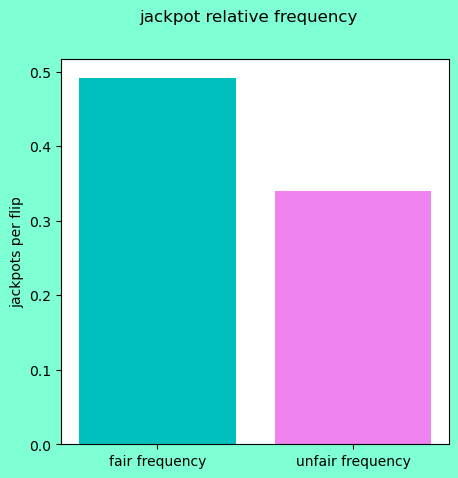

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5), facecolor='aquamarine')
plt.suptitle('jackpot relative frequency')
plt.ylabel('jackpots per flip')
plt.bar(['fair frequency', 'unfair frequency'],[r_f_freq, r_u_freq], color= ['c', 'violet'])

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [13]:
d6_1 = Die(np.arange(1,7))
d6_2 = Die(np.arange(1,7))
d6_3 = Die(np.arange(1,7))
d6_1.get_state()


face,0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [14]:
d6_1.adj_wt(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [15]:
d6_2.adj_wt(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
fair_five = Game([d6_3,d6_3,d6_3,d6_3,d6_3])
fair_five.play(10000)

die #,1,2,3,4,5
roll #,,,,,
1,1,4,5,6,1
2,5,1,1,6,5
3,2,6,4,2,1
4,6,2,5,3,1
5,1,3,2,5,3
...,...,...,...,...,...
9996,2,4,5,1,3
9997,2,5,3,2,2
9998,4,5,5,5,6


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [17]:
un_five = Game([d6_1,d6_2,d6_3,d6_3,d6_3])
un_five.play(10000)

die #,1,2,3,4,5
roll #,,,,,
1,6,6,5,2,3
2,6,1,2,2,3
3,3,2,5,1,1
4,1,4,2,1,2
5,2,1,5,3,6
...,...,...,...,...,...
9996,5,1,2,1,6
9997,6,1,4,2,6
9998,6,1,6,6,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [18]:
f_die_anal = Analyzer(fair_five)
f_die_freq = f_die_anal.jackpot()
f_die_freq


5

In [19]:

u_die_anal = Analyzer(un_five)
u_die_freq = u_die_anal.jackpot()
u_die_freq


5

<BarContainer object of 2 artists>

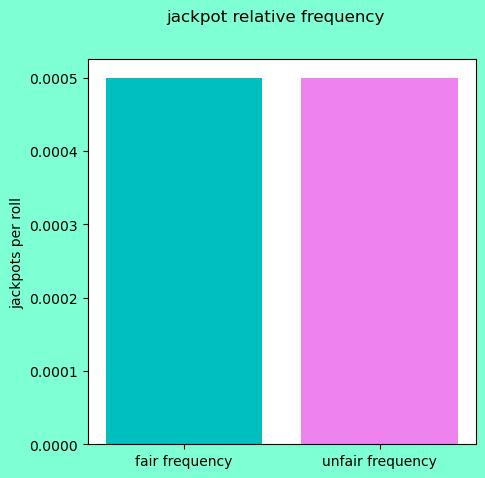

In [20]:

r_f_die_freq = f_die_freq/10000
r_u_die_freq = u_die_freq/10000
plt.figure(figsize=(5, 5), facecolor='aquamarine')
plt.suptitle('jackpot relative frequency')
plt.ylabel('jackpots per roll')
plt.bar(['fair frequency', 'unfair frequency'],[r_f_die_freq, r_u_die_freq], color= ['c', 'violet'])

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [21]:
fil = open('montecarlo/english_letters.txt', 'r')
let =[]
wt= []
for l in fil:
    let.append(l[0])
    wt.append(l[2:].strip())
# print(wt)
let_tup = zip(let, wt)
alph = Die(np.array(let))
for a, w in let_tup:
    alph.adj_wt(a, int(w))

alph.get_state()

face,0
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [22]:
scrab = Game([alph, alph, alph, alph])
scrab.play(1000)

die #,1,2,3,4
roll #,,,,
1,D,R,N,E
2,I,D,I,Y
3,D,S,U,I
4,N,S,K,A
5,T,T,O,N
...,...,...,...,...
996,S,S,S,E
997,W,F,M,H
998,C,V,E,H


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [23]:
fil_2 = open('montecarlo/scrabble_words.txt', 'r')
scrab_lyzer = Analyzer(scrab)
vocab = []
for l in fil_2:
    vocab.append(l.strip())
vocab_count = len(vocab)
vocab


perm_df = scrab_lyzer.perm_count()
perm_df

p_tup = perm_df.index.to_list()
p_tup

p_lis = [''.join(w) for w in p_tup]
p_lis
b_lis = []
game_count=0
for word in p_lis:
    if word in vocab:
        game_count+=1
        b_lis.append(word)

print(f'words in vocabulary: {game_count}')

words in vocabulary: 49


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [24]:
scrab2 = Game([alph, alph, alph, alph, alph])
scrab2.play(1000)
scrab_lyzer_2 = Analyzer(scrab2)

perm_df = scrab_lyzer_2.perm_count()
perm_df

p_tup = perm_df.index.to_list()
p_tup

p_lis = [''.join(w) for w in p_tup]
p_lis
b_lis = []
game_count=0
for word in p_lis:
    if word in vocab:
        game_count+=1
        b_lis.append(word)

print(f'words in vocabulary: {game_count}')
print('there are less words created from this version of the game')

words in vocabulary: 10
there are less words created from this version of the game
